# 🌾 Crop Prediction using Multiple ML Algorithms 🌱🤖

## 📌 Overview
This project uses various **machine learning algorithms** to predict the most suitable **crop** based on environmental features.

## 🧪 Algorithms Used
- 🌳 **Decision Tree Classifier**
- 🌲 **Random Forest Classifier**
- 📈 **Logistic Regression**
- 🔷 **Support Vector Machine (SVM)**

## 📂 Dataset Features
- **N**, **P**, **K** (soil nutrients)
- **Temperature**, **Humidity**
- **pH**, **Rainfall**
- **Target**: Crop label (e.g., rice, wheat, mango, etc.)

## 🎯 Objective
To classify the most suitable **crop** based on given environmental parameters using different ML techniques.

## 📊 Visualizations Included
- 📉 **Decision Boundaries**
- 🌀 **PCA Plots**
- ✅ **Model Accuracy Comparison**

---


## 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 

## 2. Load Dataset|

In [2]:
df = pd.read_csv("/kaggle/input/farmwise-recommendation/Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## 3. Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## 4. Extract Numeric Columns For plotting Graph and Distribution 

In [5]:
df_numeric = df.select_dtypes(include = 'number')
df_numeric

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


## 5. EDA (Exploratory data Analysis)

### Distribution among Numerical columns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


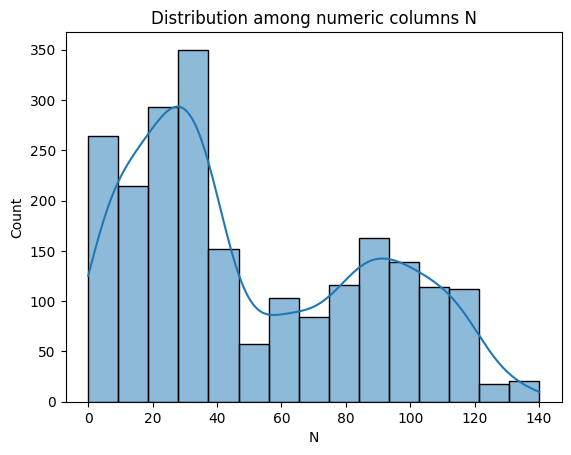

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


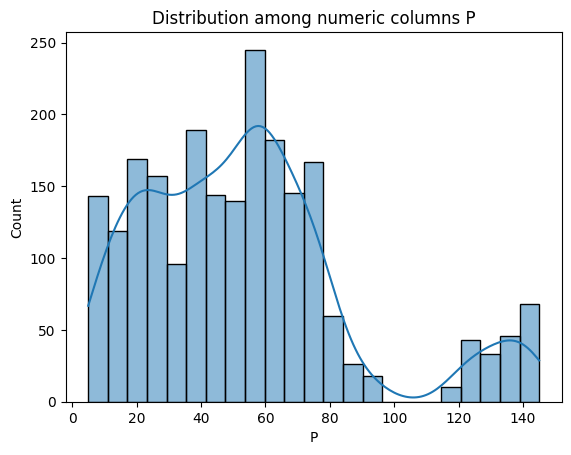

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


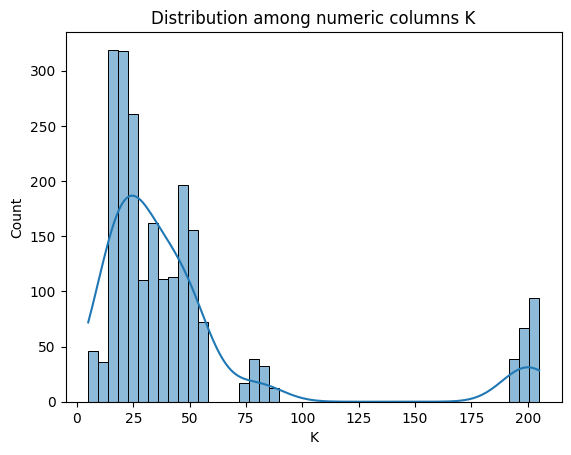

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


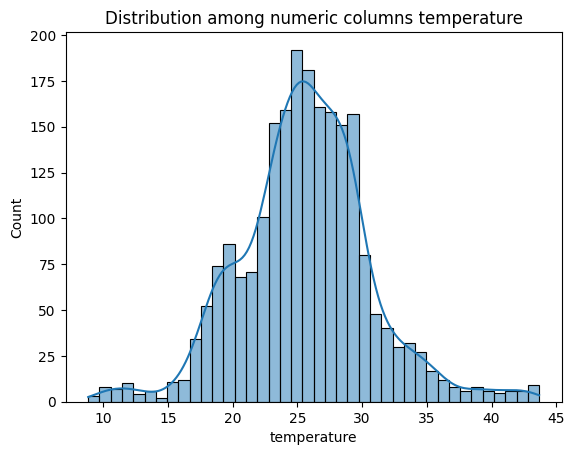

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


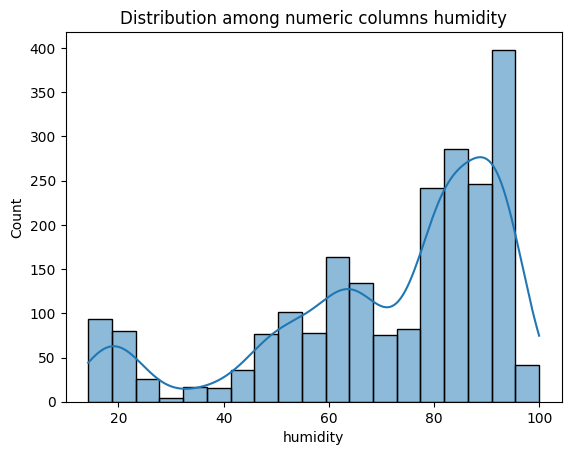

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


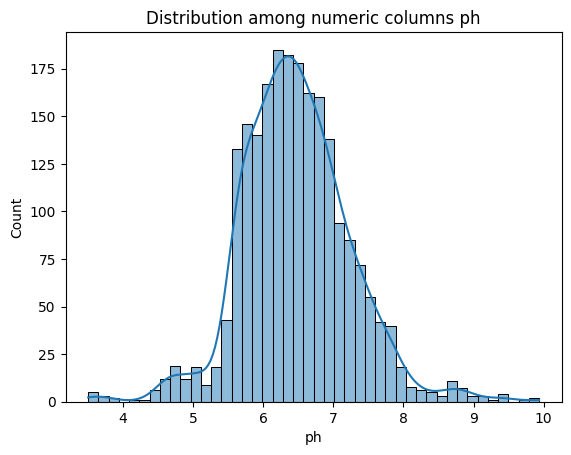

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


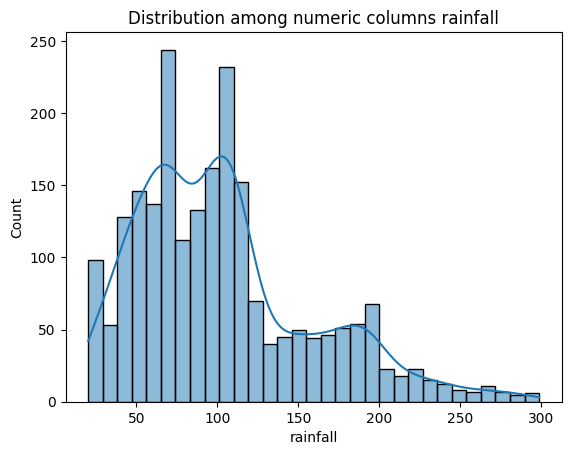

In [6]:
for col in df_numeric:
    sns.histplot(df[col],kde = True)
    plt.title(f"Distribution among numeric columns {col}")
    plt.show()

### Distribution of rainfall according to crop

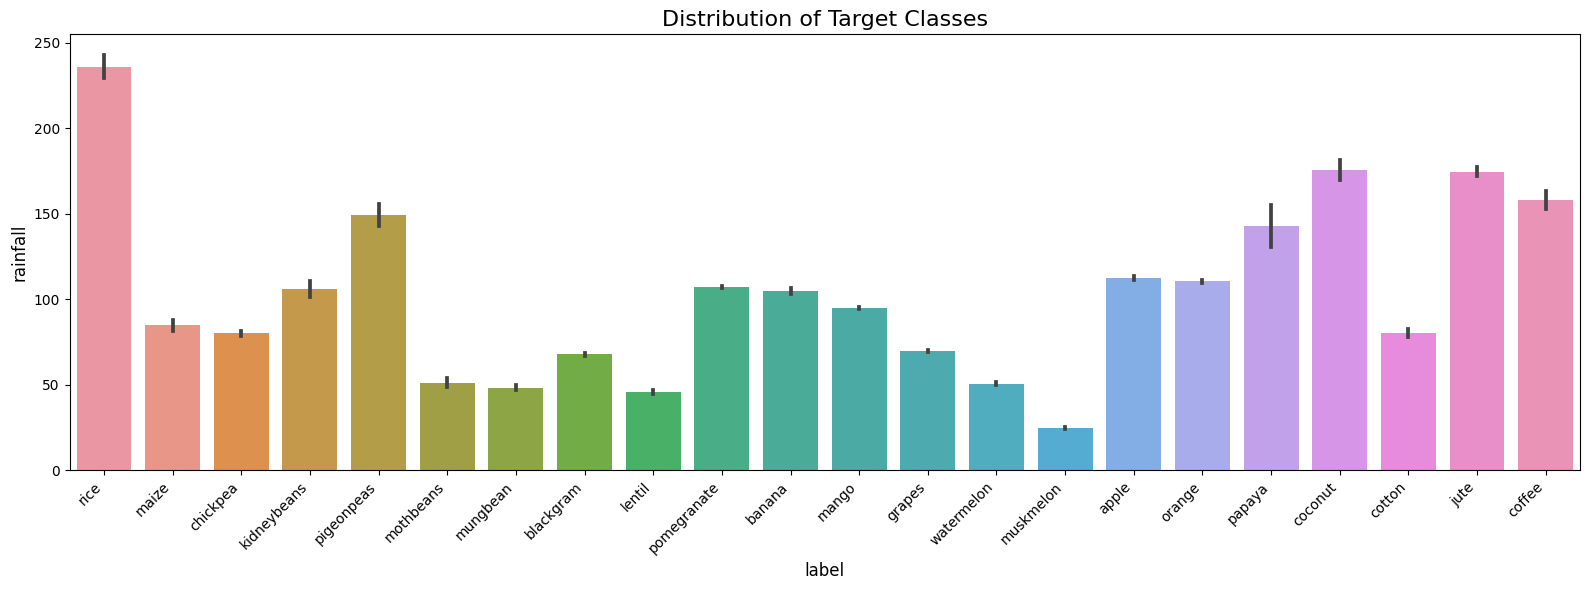

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(x='label',y ='rainfall', data=df)
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('label', fontsize=12)
plt.ylabel('rainfall', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Prevent label cutoff

plt.show()


In [12]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
df['label'].nunique()

22

### Distribution of temperature according to crop

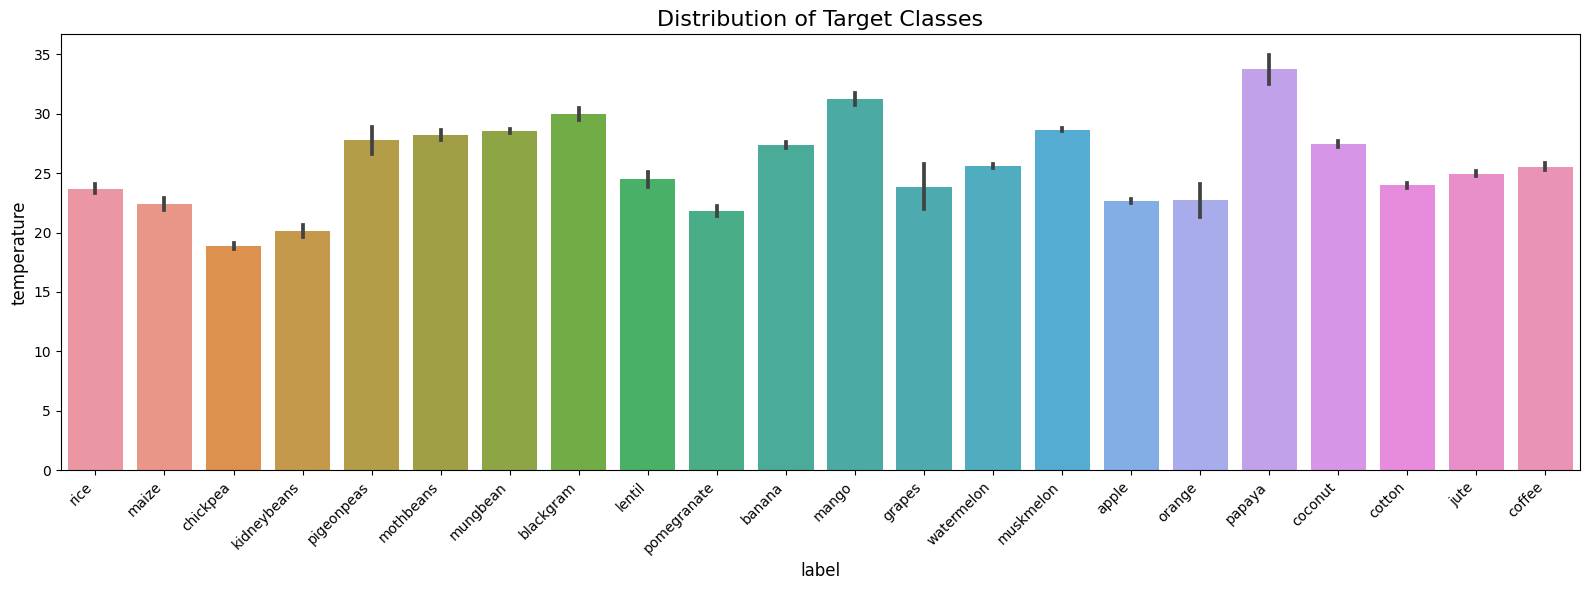

In [15]:
plt.figure(figsize=(16, 6)) 
sns.barplot(x='label',y ='temperature', data=df)
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('label', fontsize=12)
plt.ylabel('temperature', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Prevent label cutoff

plt.show()

### Distribution of Humidity according to crop type

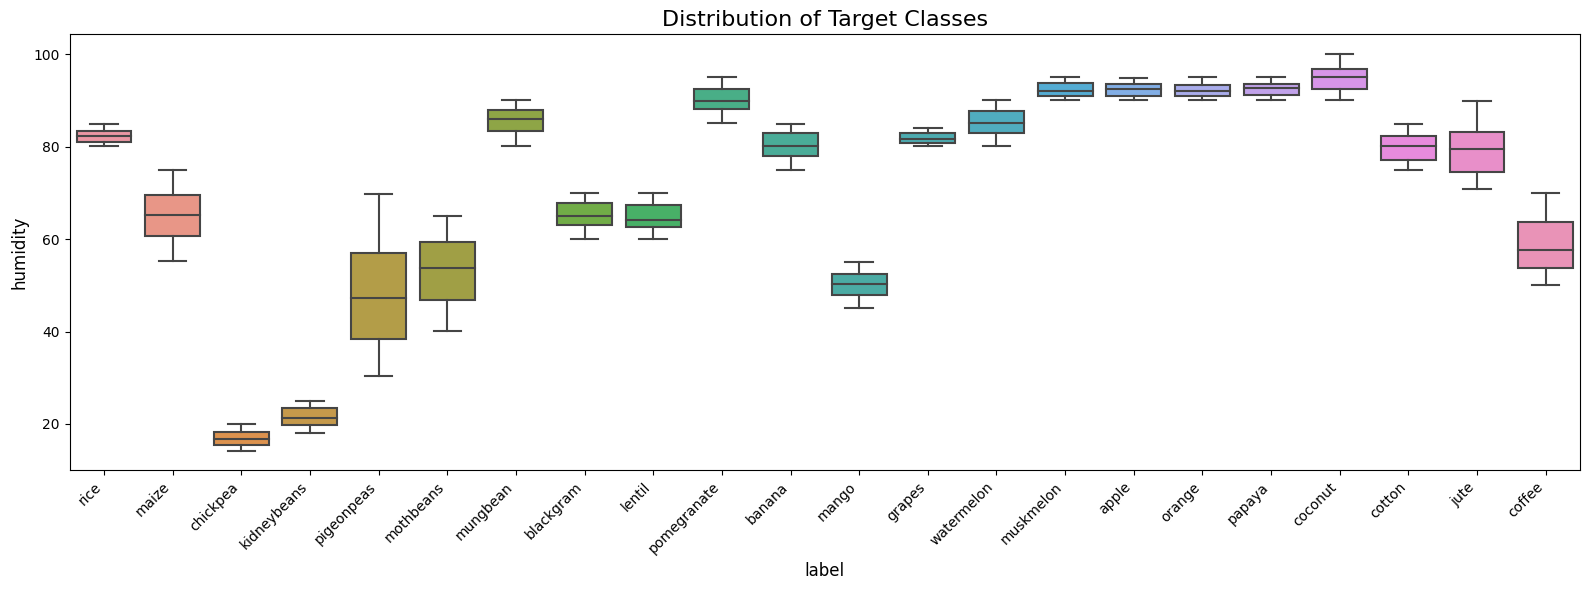

In [18]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='label', y='humidity', data=df)
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('label', fontsize=12)
plt.ylabel('humidity', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Prevent label cutoff

plt.show()


## 6. Import Necessary Libraries

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [25]:
X = df.iloc[:,0:7]
y = df.iloc[:,-1]

## 7. Encode the output variable

In [26]:
lb = LabelEncoder()
encoded_y = lb.fit_transform(y)

In [28]:
 X_train,X_test,y_train,y_test = train_test_split(X,encoded_y,test_size=0.2,random_state = 42)

In [34]:
numeric_cols = ['N','P','K','temperature','humidity','ph','rainfall']

In [90]:
scaler = StandardScaler()
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=20,min_samples_split=10,
    min_samples_leaf=5)
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale',random_state = 42)
lr = LogisticRegression()

In [91]:
preprocessor = ColumnTransformer(
    transformers = [
        ('scaler',scaler,numeric_cols),
    
])

## 8. Using Pipeline

In [92]:
pipeline = Pipeline(
    steps = [
        ('preprocessor',preprocessor),
        ('rf',rf)
    ]
)

In [93]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['N', 'P', 'K', 'temperature',
                                                   'humidity', 'ph',
                                                   'rainfall'])])),
                ('rf', RandomForestClassifier(max_depth=10))])

In [94]:
y_pred1 = pipeline.predict(X_test)

In [95]:
y_pred1_train = pipeline.predict(X_train)

## 9. Check accuracy for each algorithm 

In [96]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred1))

0.9931818181818182


In [97]:
print(accuracy_score(y_train,y_pred1_train))

0.9977272727272727


In [98]:
pipeline2 = Pipeline(
    steps = [
        ('preprocessor',preprocessor),
        ('dt',dt)
    ]
)

In [99]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['N', 'P', 'K', 'temperature',
                                                   'humidity', 'ph',
                                                   'rainfall'])])),
                ('dt',
                 DecisionTreeClassifier(max_depth=20, min_samples_leaf=5,
                                        min_samples_split=10))])

In [100]:
y_pred2 = pipeline2.predict(X_test)

In [101]:
y_pred2_train = pipeline2.predict(X_train)

In [102]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred2))

0.9727272727272728


In [103]:
print(accuracy_score(y_train,y_pred2_train))

0.9914772727272727


In [45]:
pipeline3 = Pipeline(
    steps = [
        ('preprocessor',preprocessor),
        ('svc',svc)
    ]
)

In [46]:
pipeline3.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['N', 'P', 'K', 'temperature',
                                                   'humidity', 'ph',
                                                   'rainfall'])])),
                ('svc', SVC(random_state=42))])

In [112]:
y_pred3 = pipeline3.predict(X_test)

In [113]:
y_pred3_train = pipeline3.predict(X_train)

In [114]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred3))

0.9681818181818181


In [115]:
print(accuracy_score(y_train,y_pred3_train))

0.9880681818181818


In [47]:
pipeline4 = Pipeline(
    steps = [
        ('preprocessor',preprocessor),
        ('lr',lr)
    ]
)

In [48]:
pipeline4.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['N', 'P', 'K', 'temperature',
                                                   'humidity', 'ph',
                                                   'rainfall'])])),
                ('lr', LogisticRegression())])

In [116]:
y_pred4 = pipeline4.predict(X_test)

In [117]:
y_pred4_train = pipeline4.predict(X_train)

In [118]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred4))

0.9636363636363636


In [119]:
print(accuracy_score(y_train,y_pred4_train))

0.977840909090909


## Best model is random forest


In [121]:
from sklearn.decomposition import PCA

## 10. plot decision boundary for each algorith,

/tmp/ipykernel_35/3819565410.py:35: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


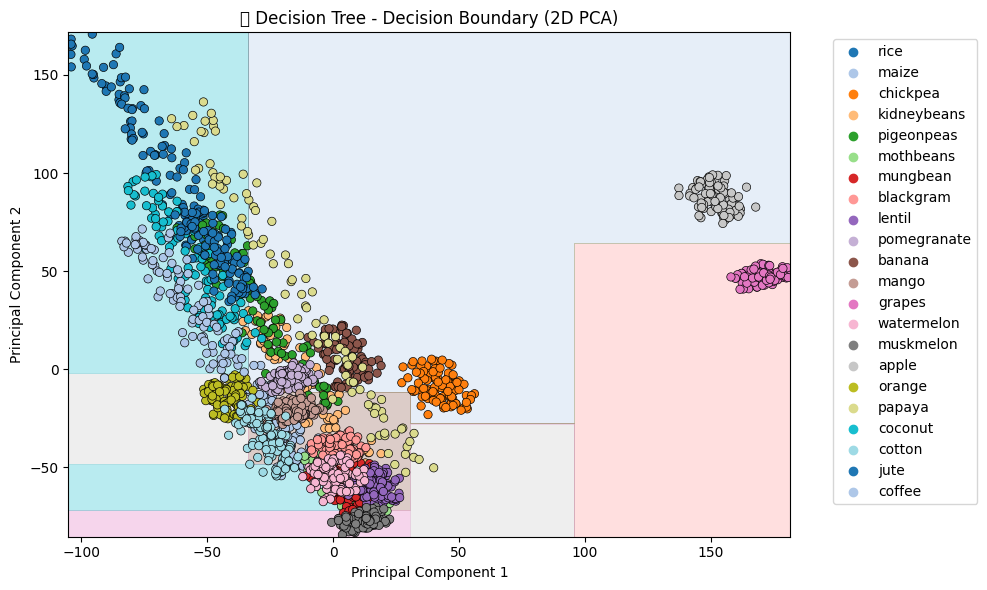

In [124]:
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])
X = df.drop(['label', 'encoded_label'], axis=1)
y = df['encoded_label']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab20')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y), palette='tab20', edgecolor='k')
plt.title('🌳 Decision Tree - Decision Boundary (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [125]:
pca_components = pd.DataFrame(
    pca.components_, 
    columns=X.columns,
    index=['PC1', 'PC2']
)

# Show which original features influenced each principal component
print("🔍 Feature contributions to Principal Components:")
display(pca_components.T.sort_values(by='PC1', ascending=False))

🔍 Feature contributions to Principal Components:


,PC1,PC2
K,0.758765,0.393267
P,0.440880,0.207409
humidity,0.015316,0.067716
ph,-0.001467,-0.002582
temperature,-0.010980,-0.009163
N,-0.180735,-0.028231
rainfall,-0.443709,0.892664


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_35/1269040202.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


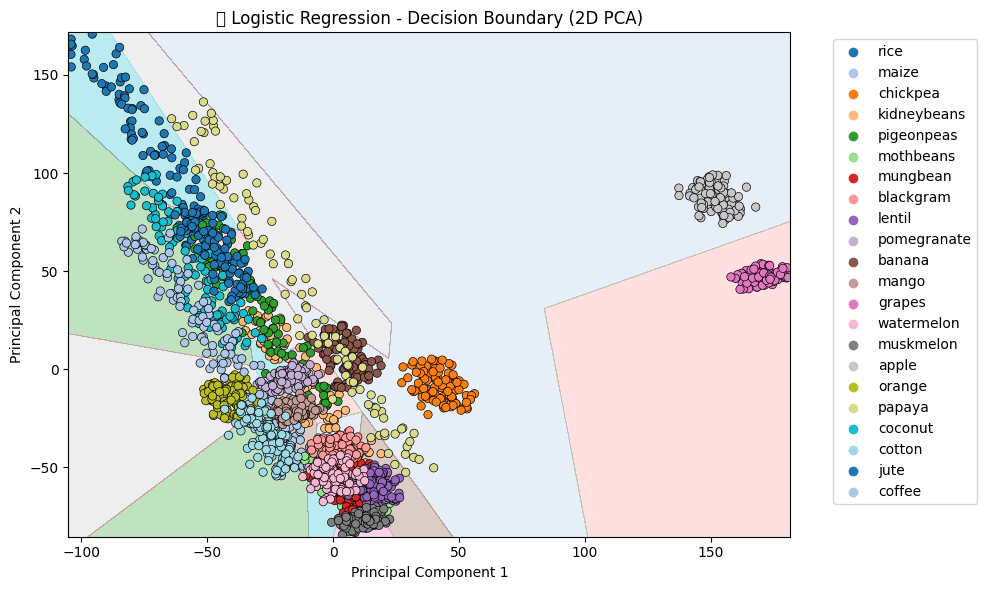

In [126]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Step 6: Decision Boundary Plot
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab20')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y), palette='tab20', edgecolor='k')
plt.title('📈 Logistic Regression - Decision Boundary (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_35/3812536962.py:20: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


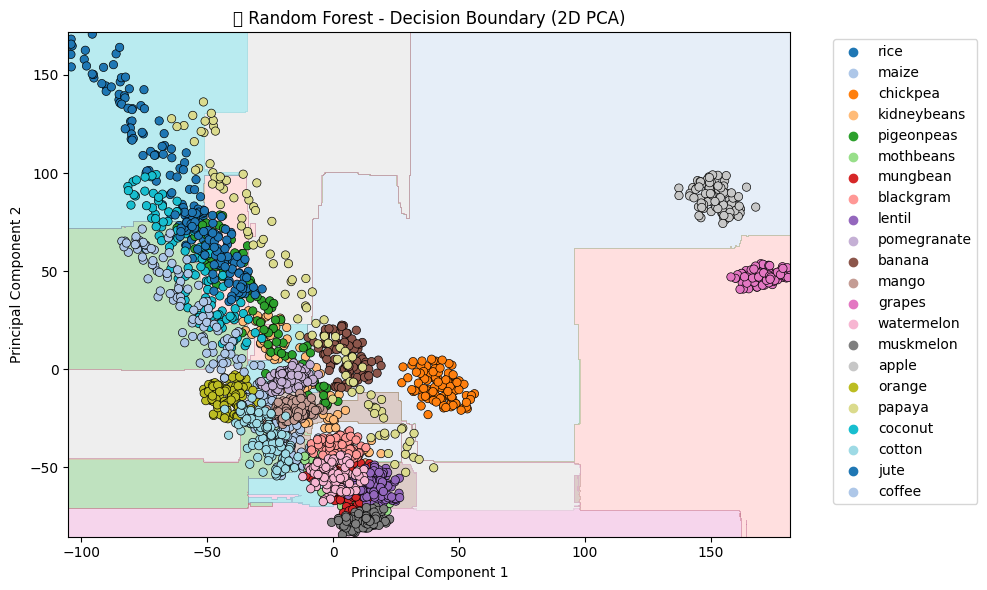

In [127]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Decision Boundary Plot
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab20')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y), palette='tab20', edgecolor='k')
plt.title('🌳 Random Forest - Decision Boundary (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()